In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/dataset/homeprices.csv')

In [ ]:
data.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [ ]:
data.drop(['town'],axis=1)

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000
5,2600,585000
6,2800,615000
7,3300,650000
8,3600,710000
9,2600,575000


In [ ]:
data.isna().sum()

town     0
area     0
price    0
dtype: int64

Text(0.5, 1.0, 'Box plot of area')

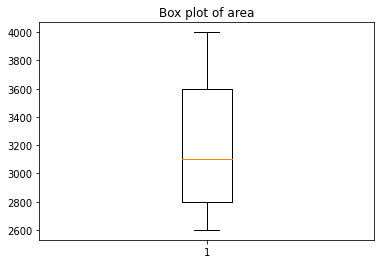

In [ ]:
plt.boxplot(data['area'])
plt.title('Box plot of area')

In [ ]:
q1=np.percentile(data['area'],25,interpolation='midpoint')
q2=np.percentile(data['area'],50,interpolation='midpoint')
q3=np.percentile(data['area'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

2800.0
3100.0
3600.0


In [ ]:
iqr=q3-q1
low_limit=q1-1.5*iqr
up_limit=q3+1.5*iqr

print(low_limit)
print(up_limit)

1600.0
4800.0


In [ ]:
outlier=[]
for X in data['area']:
   if((X>up_limit) or (X<low_limit)):
     outlier.append(X)

outlier

[]

In [ ]:
data.columns

Index(['town', 'area', 'price'], dtype='object')

Text(0.5, 1.0, 'Box plot of price')

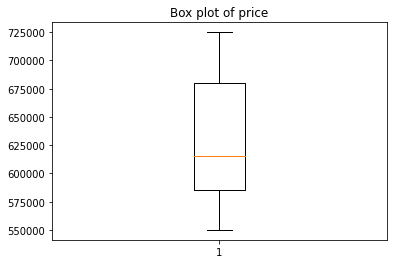

In [ ]:
plt.boxplot(data['price'])
plt.title('Box plot of price')

In [ ]:
q1=np.percentile(data['price'],25,interpolation='midpoint')
q2=np.percentile(data['price'],50,interpolation='midpoint')
q3=np.percentile(data['price'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

585000.0
615000.0
680000.0


In [ ]:
iqr=q3-q1
low_limit=q1-1.5*iqr
up_limit=q3+1.5*iqr

print(low_limit)
print(up_limit)

442500.0
822500.0


In [ ]:
outlier=[]
for X in data['price']:
   if((X>up_limit) or (X<low_limit)):
     outlier.append(X)

outlier

[]

In [ ]:
data=pd.get_dummies(data)
data.head()

,area,price,town_monroe township,town_robinsville,town_west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0


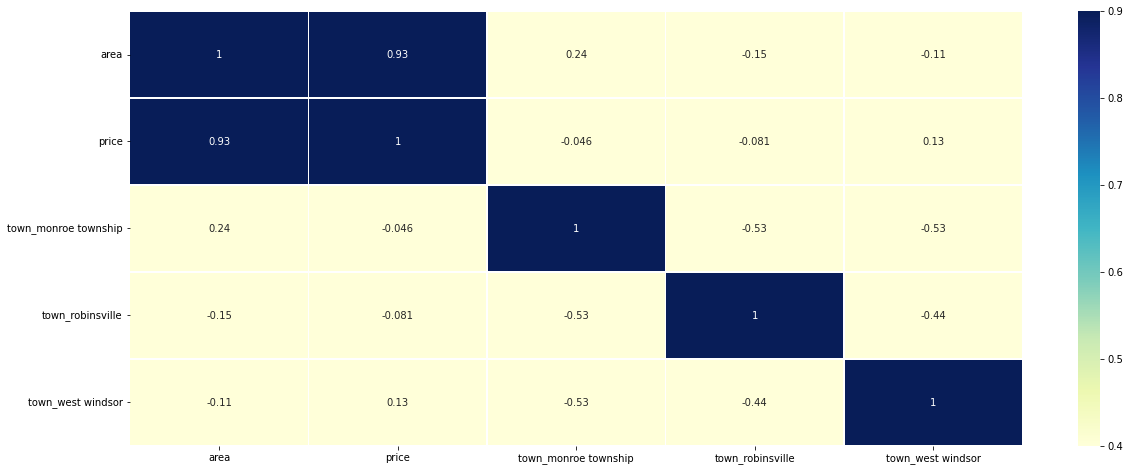

In [ ]:

corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')

In [ ]:
y=data['price']
X=data.drop('price',axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [ ]:
predictions

array([627064.10256411, 558944.44444449, 529196.58119663])

In [ ]:
y_test

11    620000
9     575000
0     550000
Name: price, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSC is:',mean_squared_error(y_test,predictions))

MSC is: 246821547.7135745


In [ ]:
from sklearn.metrics import r2_score
print('R squared value is :',r2_score(y_test,predictions))

R squared value is : 0.7057756384871298
